# Análise quantitativa dos tipos de vacinas aplicadas em Recife-PE

# Primeiros passos
Realizaremos a importação das bibliotecas que serão utilizadas na análise.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

A seguir, importaremos os dados em csv e visualizaremos eles.

In [3]:
data = pd.read_csv('vacinados.csv', encoding = "UTF-8", sep=";", header=0)
data.head()

,cpf,nome,sexo,grupo,vacina,lote,dose,data_vacinacao,local_vacinacao
0,***.574.544-**,AABAN VASCONCELOS ZYZZYAG,MASCULINO,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),219VCD270W,2.0,2021-10-19,DRIVE THRU PARQUE DE EXPOSIÇÃO
1,***.574.544-**,AABAN VASCONCELOS ZYZZYAG,MASCULINO,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),216VCD206Z,1.0,2021-07-26,DRIVE THRU PARQUE DE EXPOSIÇÃO
2,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,2.0,2021-03-04,CENTRO DE VACINAÇÃO PARQUE DE EXPOSIÇÃO
3,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210016,1.0,2021-02-11,CENTRO DE VACINAÇÃO COMPAZ MIGUEL ARRAES
4,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,3 - COMIRNATY (PFIZER),32010BD,3.0,2021-10-07,CENTRO DE VACINAÇÃO UNINASSAU


Agora, iremos retirar colunas que não serão utilizadas nessa análise, a fim de otimizar recursos e facilitar a visualização do DataFrame.

In [4]:
data =  data.drop(columns=['cpf','nome','sexo','grupo','lote','data_vacinacao','local_vacinacao'])
data.head()

,vacina,dose
0,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),2.0
1,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),1.0
2,1 - CORONAVAC - SINOVAC (BUTANTAN),2.0
3,1 - CORONAVAC - SINOVAC (BUTANTAN),1.0
4,3 - COMIRNATY (PFIZER),3.0


# Analise de doses de vacinas aplicadas

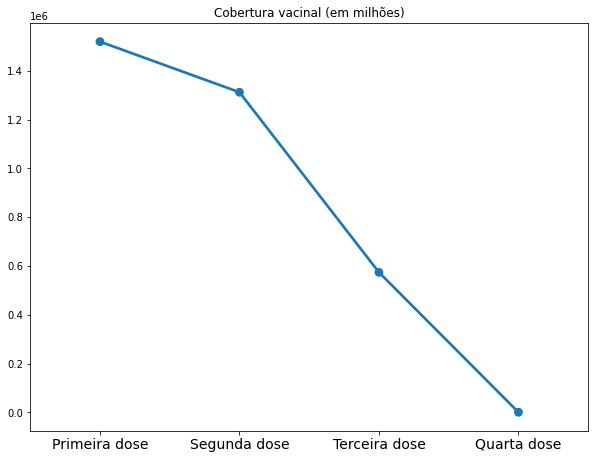

In [44]:
umaDose = data.loc[data['dose'] == 1]
qtdRecebUmaDose = umaDose.count()[0]
duasDoses = data.loc[data['dose'] == 2]
qtdRecebDuasDoses = duasDoses.count()[0]
tresDoses = data.loc[data['dose'] == 3]
qtdRecebTresDoses = tresDoses.count()[0]
quatroDoses = data.loc[data['dose'] == 4]
qtdRecebQuatroDoses = quatroDoses.count()[0]

labels = ['Primeira dose', 'Segunda dose', 'Terceira dose', 'Quarta dose']
values = [qtdRecebUmaDose,qtdRecebDuasDoses, qtdRecebTresDoses,qtdRecebQuatroDoses ]

fig, ax = plt.subplots(figsize=(10, 7.5))
sns.pointplot(data=data, x=labels, y=values)
ax.set_title('Cobertura vacinal (em milhões)')
plt.show()

Observa-se um dado preocupante na cobertura vacinal da população, porque há uma queda no número de doses aplicadas para a segunda dose e essa queda fica, ainda mais evidente, em comparação com a de doses aplicadas para terceira dose, pois das mais de 1.4 milhões de pessoas que tomaram a primeira dose, menos da metade tomou a terceira dose. Além disso, o gráfico apresenta a quarta dose, que tem sua aplicação em início com cerca de 1000 doses aplicadas.

# Análise quantitativa de vacinas aplicadas 

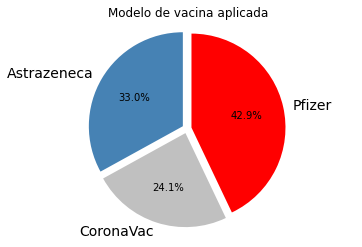

In [37]:
oxford = data.loc[data['vacina'] == '2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)']
qtdRecebOxford = oxford.count()[0]
coronavac = data.loc[data['vacina'] == '1 - CORONAVAC - SINOVAC (BUTANTAN)']
qtdRecebCoronavac = coronavac.count()[0]
pfizer = data.loc[data['vacina'] == '3 - COMIRNATY (PFIZER)']
qtdRecebPfizer = pfizer.count()[0]

labels = ['Astrazeneca', 'CoronaVac', 'Pfizer']
values = [qtdRecebOxford, qtdRecebCoronavac, qtdRecebPfizer]

fig1, ax1 = plt.subplots()
plt.rcParams['xtick.labelsize'] = 14
ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors = ['steelblue', 'silver','red'], explode=(0.05, 0.05, 0.05))
plt.title('Modelo de vacina aplicada')
ax1.axis('equal')
plt.show()

Observa-se um predomínio do uso da pfizer na cidade do Recife, uma vacina à base de mRNA para combater o vírus SARS-CoV-2 com eficácia global de 95%.

# Análise de vacinas aplicadas por dose
Agora, analisaremos as vacinas aplicadas por dose separadamente.

# Primeira dose

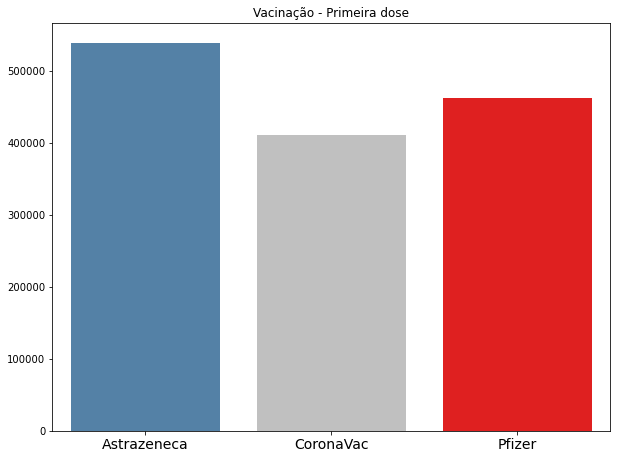

In [38]:
primeiraDoseAstrazeneca = (data['dose'] == 1) & (data['vacina'] == '2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)')
qtdRecebUmaDoseAstrazeneca = data[primeiraDoseAstrazeneca].count()[0]
primeiraDoseCoronavac = (data['dose'] == 1) & (data['vacina'] == '1 - CORONAVAC - SINOVAC (BUTANTAN)')
qtdRecebUmaDoseCoronavac = data[primeiraDoseCoronavac].count()[0]
primeiraDosePfizer = (data['dose'] == 1) & (data['vacina'] == '3 - COMIRNATY (PFIZER)')
qtdRecebUmaDosePfizer = data[primeiraDosePfizer].count()[0]

labels1 = ['Astrazeneca', 'CoronaVac', 'Pfizer']
values1 = [qtdRecebUmaDoseAstrazeneca, qtdRecebUmaDoseCoronavac, qtdRecebUmaDosePfizer]


fig, ax = plt.subplots(figsize=(10, 7.5))
sns.barplot(x=labels1, y=values1, color ='steelblue', palette=['steelblue', 'silver','red'] )
ax.set_title('Vacinação - Primeira dose')
plt.show()

Na primeira dose, observa-se uma distribuição bem equilibrada dos tipos de vacinas aplicadas, com a Astrazeneca tendo a maioria de doses aplicadas.

# Segunda dose

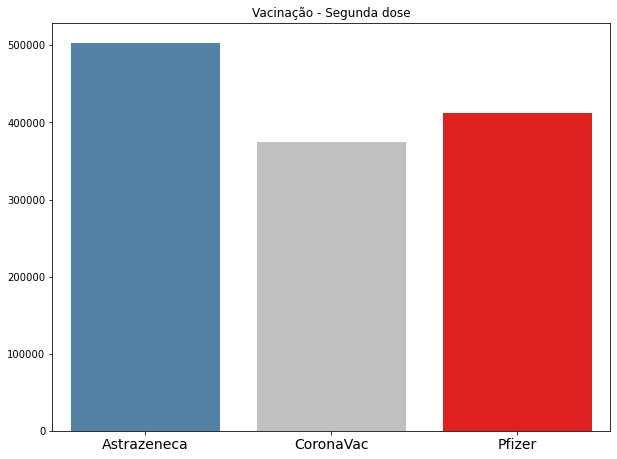

In [39]:
segundaDoseAstrazeneca = (data['dose'] == 2) & (data['vacina'] == '2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)')
qtdRecebSegundaDoseAstrazeneca = data[segundaDoseAstrazeneca].count()[0]
segundaDoseCoronavac = (data['dose'] == 2) & (data['vacina'] == '1 - CORONAVAC - SINOVAC (BUTANTAN)')
qtdRecebSegundaDoseCoronavac = data[segundaDoseCoronavac].count()[0]
segundaDosePfizer = (data['dose'] == 2) & (data['vacina'] == '3 - COMIRNATY (PFIZER)')
qtdRecebSegundaDosePfizer = data[segundaDosePfizer].count()[0]

labels2 = ['Astrazeneca', 'CoronaVac', 'Pfizer']
values2 = [qtdRecebSegundaDoseAstrazeneca, qtdRecebSegundaDoseCoronavac, qtdRecebSegundaDosePfizer]


fig, ax = plt.subplots(figsize=(10, 7.5))
sns.barplot(x=labels2, y=values2, color ='steelblue', palette=['steelblue', 'silver','red'] )
ax.set_title('Vacinação - Segunda dose')
plt.show()

Na segunda dose, observa-se, também, uma distribuição bem equilibrada dos tipos de vacinas aplicadas, com a Astrazeneca, novamente, tendo a maioria de doses aplicadas.

# Terceira dose

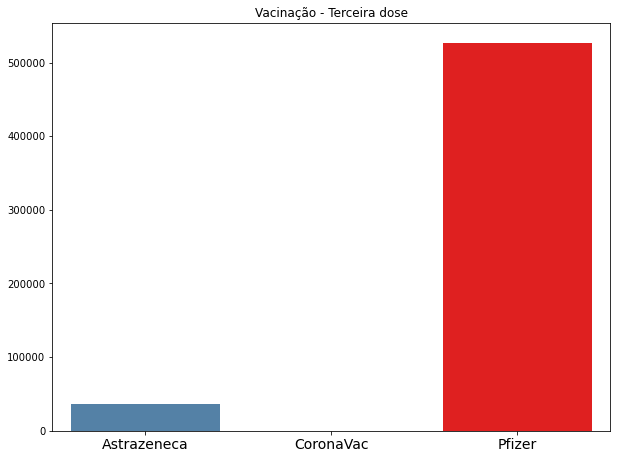

In [40]:
terceiraDoseAstrazeneca = (data['dose'] == 3) & (data['vacina'] == '2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)')
qtdRecebTerceiraDoseAstrazeneca = data[terceiraDoseAstrazeneca].count()[0]
terceiraDoseCoronavac = (data['dose'] == 3) & (data['vacina'] == '1 - CORONAVAC - SINOVAC (BUTANTAN)')
qtdRecebTerceiraDoseCoronavac = data[terceiraDoseCoronavac].count()[0]
terceiraDosePfizer = (data['dose'] == 3) & (data['vacina'] == '3 - COMIRNATY (PFIZER)')
qtdRecebTerceiraDosePfizer = data[terceiraDosePfizer].count()[0]

labels3 = ['Astrazeneca', 'CoronaVac', 'Pfizer']
values3 = [qtdRecebTerceiraDoseAstrazeneca, qtdRecebTerceiraDoseCoronavac, qtdRecebTerceiraDosePfizer]


fig, ax = plt.subplots(figsize=(10, 7.5))
sns.barplot(x=labels3, y=values3, color ='steelblue', palette=['steelblue', 'silver','red'] )
ax.set_title('Vacinação - Terceira dose')
plt.show()

Na terceira dose, observa-se a aplicação predominantemente da Pfizer na população recifense.

# Quarta dose

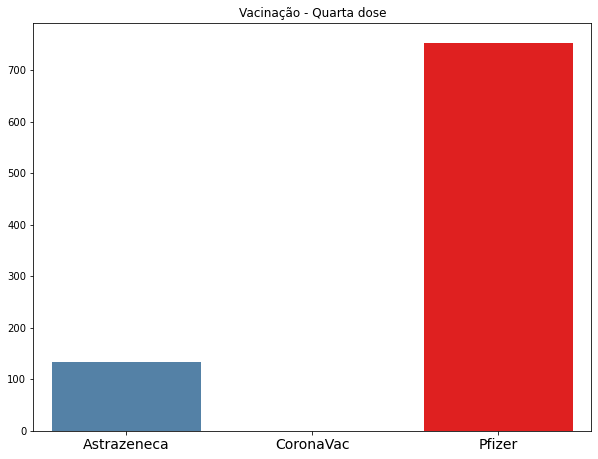

In [41]:
quartaDoseAstrazeneca = (data['dose'] == 4) & (data['vacina'] == '2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)')
qtdRecebQuartaDoseAstrazeneca = data[quartaDoseAstrazeneca].count()[0]
quartaDoseCoronavac = (data['dose'] == 4) & (data['vacina'] == '1 - CORONAVAC - SINOVAC (BUTANTAN)')
qtdRecebQuartaDoseCoronavac = data[quartaDoseCoronavac].count()[0]
quartaDosePfizer = (data['dose'] == 4) & (data['vacina'] == '3 - COMIRNATY (PFIZER)')
qtdRecebQuartaDosePfizer = data[quartaDosePfizer].count()[0]

labels3 = ['Astrazeneca', 'CoronaVac', 'Pfizer']
values3 = [qtdRecebQuartaDoseAstrazeneca, qtdRecebQuartaDoseCoronavac, qtdRecebQuartaDosePfizer]


fig, ax = plt.subplots(figsize=(10, 7.5))
sns.barplot(x=labels3, y=values3, color ='steelblue', palette=['steelblue', 'silver','red'] )
ax.set_title('Vacinação - Quarta dose')
plt.show()

Na quarta dose, observamos um cenário parecido com o da terceira dose com a vacina da Pfizer sendo a mais aplicada.

# Assim, conclui-se que a cobertura vacinal do Recife precisa ser reforçada visando vacinar as pessoas que não tomaram a segunda dose e as doses de reforço.